In [1]:
# Import statements
import os
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,40).__str__()
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv.imread("../maps/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014.tif",2)

(46080, 92160)
23040 46080
2000 2000
(2000, 2000)


True

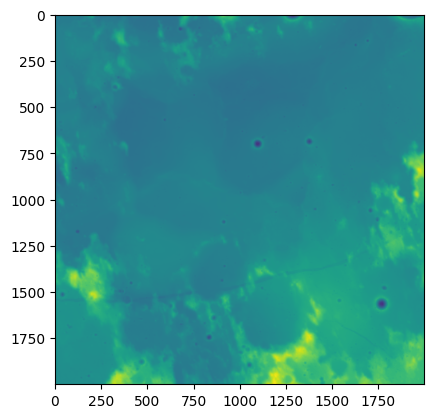

In [3]:
# Prep small section
print(image.shape)
center = np.array(image.shape,dtype=int)//2
print(center[0],center[1])
section_size = np.array([2000,2000],dtype=int)
print(section_size[0],section_size[1])
small_section = image[center[0]-section_size[0]//2:center[0]+section_size[0]//2,
											center[1]-section_size[1]//2:center[1]+section_size[1]//2]
print(small_section.shape)
plt.imshow(small_section)
cv.imwrite("interp_test.png",small_section)

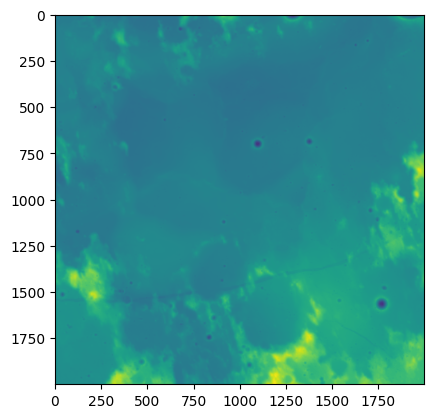

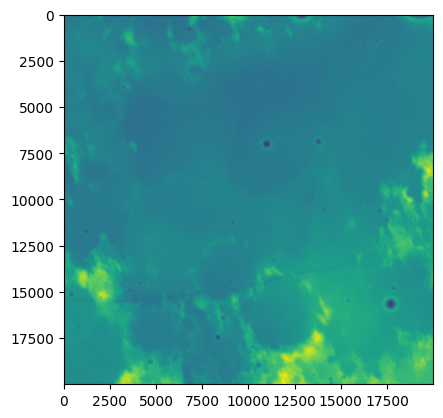

In [4]:
map = small_section
map_resize = cv.resize(map,(20000,20000),interpolation=cv.INTER_CUBIC)
plt.figure()
plt.imshow(map)
plt.figure()
plt.imshow(map_resize)

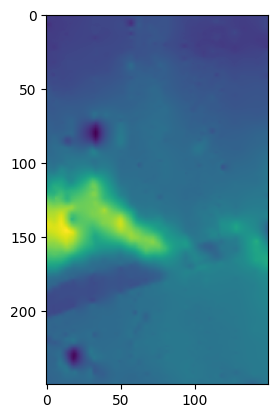

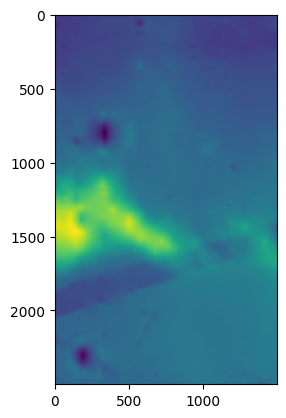

In [90]:
plt.figure()
plt.imshow(map[1250:1500,1100:1250])
plt.figure()
plt.imshow(map_resize[12500:15000,11000:12500])

In [36]:
# The Max (tm) (c) (r) derivative
def dMax(img):
  img_edge = cv.copyMakeBorder(img,0,0,1,0,cv.BORDER_REPLICATE)
  x1 = (img_edge[:,1:] - img_edge[:,:-1])
  return x1

321 13.403333333333334


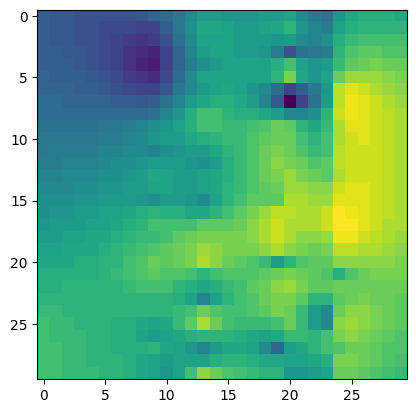

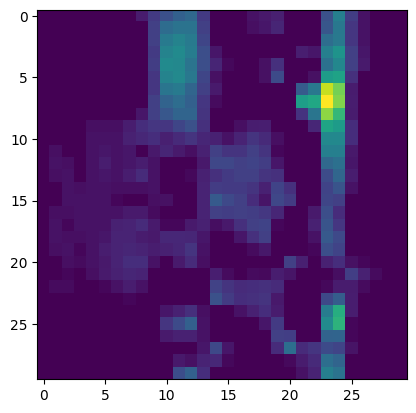

In [161]:
# The DOZER
dozer_map = map[:30,:30]
plt.figure()
plt.imshow(dozer_map)
dx = cv.Scharr(dozer_map,-1,1,0)
print(np.max(dx),np.average(dx))
dx = np.where(dx>5,dx,0)
plt.figure()
plt.imshow(dx)

15 -11 0.40444444444444444


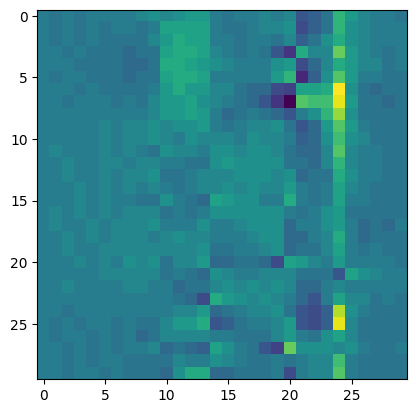

In [162]:
plt.figure()
dmap = dMax(dozer_map)
print(np.max(dmap),np.min(dmap),np.average(dmap))
plt.imshow(dmap)

19 -14 -0.024444444444444446


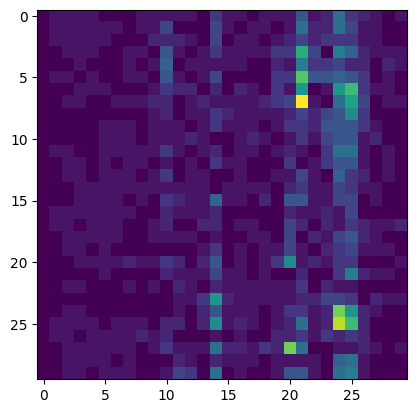

In [163]:
ddmap = dMax(dmap)
print(np.max(ddmap),np.min(ddmap),np.average(ddmap))
mod_ddmap = np.where(np.abs(ddmap)>=0.5,np.abs(ddmap),0)
plt.figure()
plt.imshow(mod_ddmap)


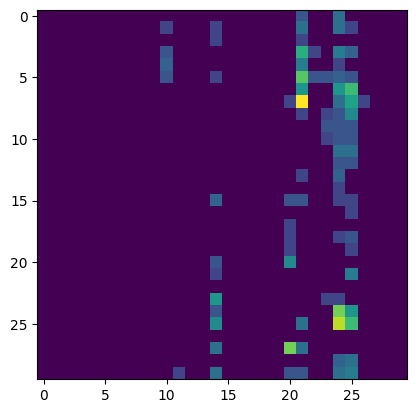

In [164]:
abs_ddmap = np.abs(ddmap)
mean = np.mean(abs_ddmap)
std = np.std(abs_ddmap)
mult = 1
thresh = mean + std*mult
ddmap_bin = np.where(abs_ddmap > thresh, abs_ddmap, 0)
plt.imshow(ddmap_bin)

In [165]:
meds = np.median(dmap,axis=0)
avgs = np.where(np.abs(meds)>=0,meds,0)
print(meds)
print(meds.shape)
#print(np.cumsum(meds))
print(np.cumsum(avgs))

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5  1.   1.   1.   2.
  1.   0.   0.   0.   1.   1.   0.  -1.  -1.   1.   5.5  1.5  0.  -1.
 -1.  -1. ]
(30,)
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5  1.5  2.5  3.5  5.5
  6.5  6.5  6.5  6.5  7.5  8.5  8.5  7.5  6.5  7.5 13.  14.5 14.5 13.5
 12.5 11.5]


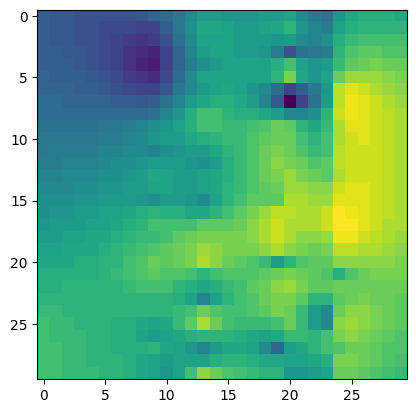

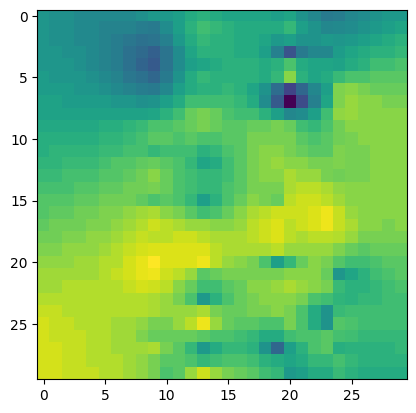

In [166]:
dozed_map = dozer_map - np.cumsum(avgs)
plt.figure()
plt.imshow(dozer_map)
plt.figure()
plt.imshow(dozed_map)

321 13.403333333333334
217.0 0.6033333333333334


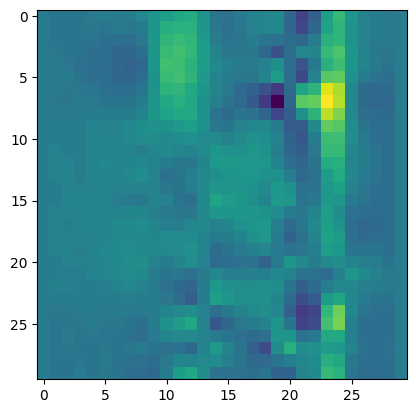

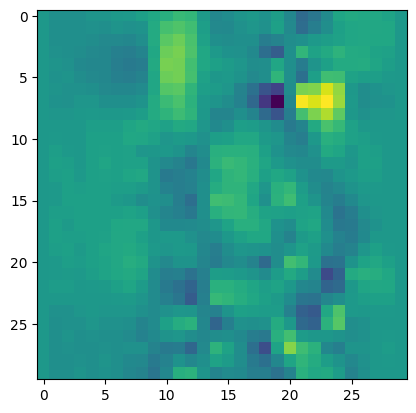

In [167]:
dxorig = cv.Scharr(dozer_map,-1,1,0)
print(np.max(dxorig),np.average(dxorig))
#dxorig = np.where(dxorig>5,dxorig,0)
plt.figure()
plt.imshow(dxorig)
dxdozed = cv.Scharr(dozed_map,-1,1,0)
print(np.max(dxdozed),np.average(dxdozed))
#dxdozed = np.where(dxdozed>5,dxdozed,0)
plt.figure()
plt.imshow(dxdozed)

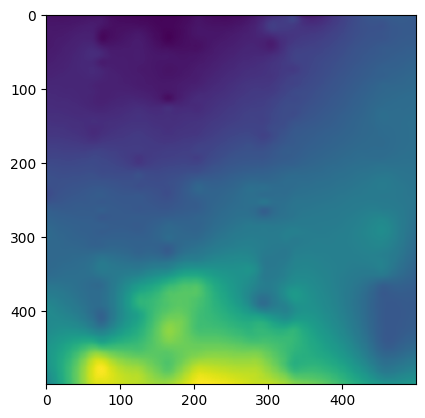

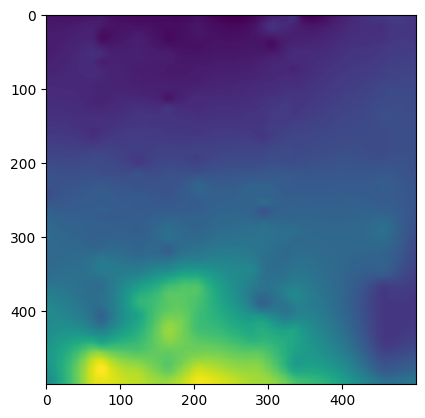

In [157]:
plt.figure()
plt.imshow(map_resize[:300,:300])
plt.figure()
plt.imshow(cv.resize(dozed_map,(300,300),interpolation=cv.INTER_CUBIC))